### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


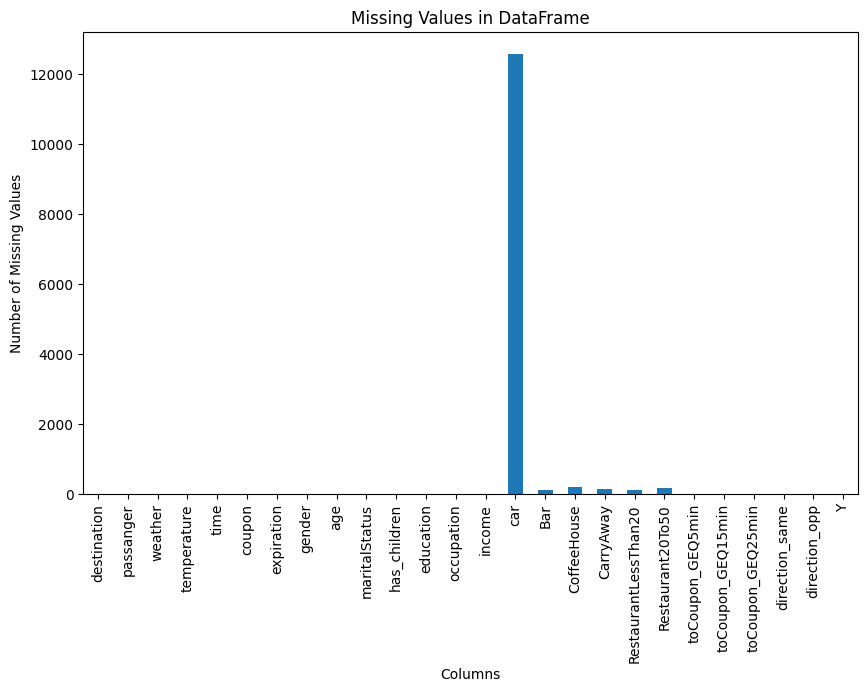

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


In [5]:
missing_values = data.isnull().sum()
print(missing_values)

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

data_types = data.dtypes
print(data_types)

In [6]:
num_duplicates = data.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 74


In [7]:
data.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [8]:
for column in data.columns:
    print(f"Value counts for {column}:")
    print(data[column].value_counts())
    print("\n")

Value counts for destination:
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64


Value counts for passanger:
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64


Value counts for weather:
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64


Value counts for temperature:
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64


Value counts for time:
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64


Value counts for coupon:
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


Value counts for expiration:
expiration
1d    7091
2h    5593
Name: count, dtype: int64


Value counts for gender:
gender
Female    6511
Male      6173
Name: count, dtype: int64



In [12]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


Explore columns with missing data, what are their values.  Are they important to the analysis

In [13]:
columns_with_missing = ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for column in columns_with_missing:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()


Unique values in 'car':
[nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']

Unique values in 'Bar':
['never' 'less1' '1~3' 'gt8' nan '4~8']

Unique values in 'CoffeeHouse':
['never' 'less1' '4~8' '1~3' 'gt8' nan]

Unique values in 'CarryAway':
[nan '4~8' '1~3' 'gt8' 'less1' 'never']

Unique values in 'RestaurantLessThan20':
['4~8' '1~3' 'less1' 'gt8' nan 'never']

Unique values in 'Restaurant20To50':
['1~3' 'less1' 'never' 'gt8' '4~8' nan]



Car does not seem a like valuable variable for analysis, dropping it.   Investigate further impact of other variables. 

3. Decide what to do about your missing data -- drop, replace, other...

In [14]:
No_car_data = data.copy()

# Drop the 'car' column
No_car_data = No_car_data.drop(columns=['car'])

# Verify the column is dropped
print(No_car_data.columns)

# Determine how many rows would be dropped if we drop any row with a null value in any column
rows_to_drop_count = No_car_data.isnull().any(axis=1).sum()

print(f"Number of rows that would be dropped if any row with a null value in any column is dropped: {rows_to_drop_count}")

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')
Number of rows that would be dropped if any row with a null value in any column is dropped: 605


~600 is a relatively small number for the overall data set of 12K, dropping rows with missing values and any duplicates 

In [15]:
# Remove duplicate rows
clean_data = No_car_data.drop_duplicates()

# Remove rows with any null values
clean_data = clean_data.dropna()

# Print out the number of rows in the new DataFrame
print(f"Number of rows in clean_data: {clean_data.shape[0]}")

Number of rows in clean_data: 12007


4. What proportion of the total observations chose to accept the coupon? 



In [16]:
# Calculate the proportion of rows where Y is 1
total_rows = clean_data.shape[0]
accepted_coupons = clean_data['Y'].sum()
proportion_accepted = accepted_coupons / total_rows

print(f"Proportion of the total observations that chose to accept the coupon: {proportion_accepted:.2f}")

Proportion of the total observations that chose to accept the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

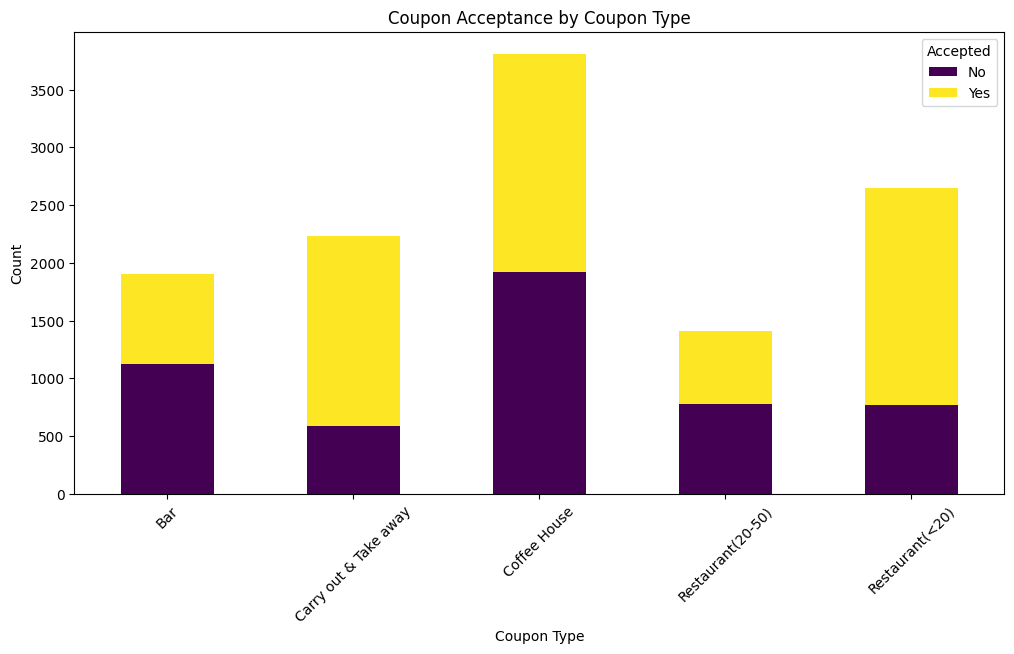

In [17]:
# Calculate the count of each category in the 'coupon' column, grouped by the 'Y' column
coupon_acceptance = clean_data.groupby(['coupon', 'Y']).size().unstack()

# Plot the stacked bar plot
coupon_acceptance.plot(kind='bar', stacked=True, colormap="viridis", figsize=(12, 6))
plt.title('Coupon Acceptance by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Accepted', labels=['No', 'Yes'])
plt.show()

6. Use a histogram to visualize the temperature column.

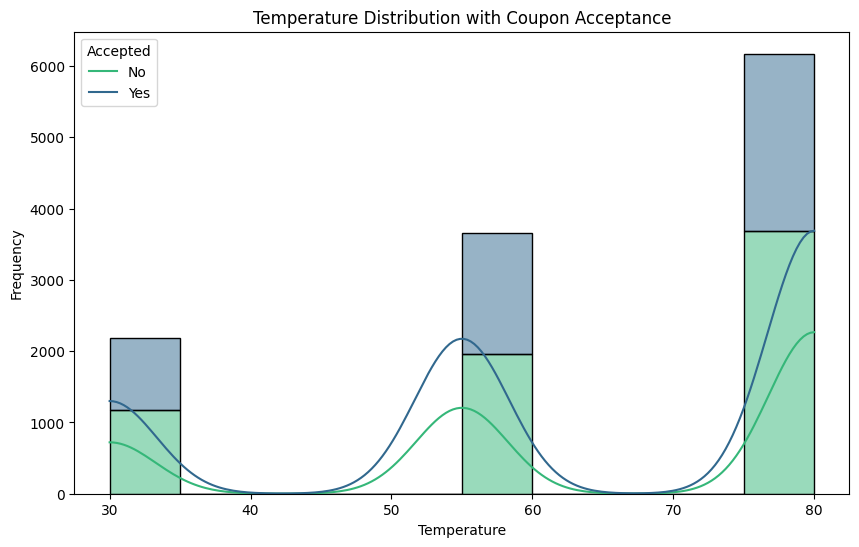

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=clean_data, x='temperature', hue='Y', bins=10, kde=True, palette="viridis", multiple="stack")
plt.title('Temperature Distribution with Coupon Acceptance')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(title='Accepted', labels=['No', 'Yes'])
plt.show()

There is a increase of the number of accepted coupons on warmer days (+75 degrees), though the acceptance rate dow not go up by much. 

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [19]:
# Assuming clean_data is the DataFrame after removing duplicates and nulls
# Filter the DataFrame to contain only bar coupons
bar_coupons_data = clean_data[clean_data['coupon'] == 'Bar']

# Display the new DataFrame
print(bar_coupons_data)

# Optionally, print the number of rows in the new DataFrame
print(f"Number of rows in bar_coupons_data: {bar_coupons_data.shape[0]}")

           destination  passanger weather  temperature  time coupon  \
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
39                Work      Alone   Sunny           55   7AM    Bar   
46     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
57                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration gender age maritalStatus  ...  CoffeeHouse CarryAway  \
24            1d   Male  21        Single  ...        less1       4~8   
3

2. What proportion of bar coupons were accepted?


Proportion of accepted bar coupons: 41.19%


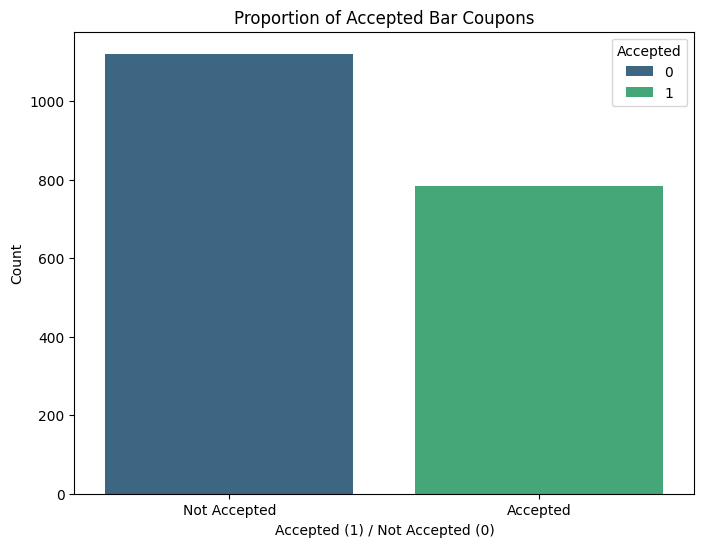

In [21]:
# Calculate the proportion of accepted coupons
total_bar_coupons = bar_coupons_data.shape[0]
accepted_bar_coupons = bar_coupons_data['Y'].sum()
proportion_accepted = accepted_bar_coupons / total_bar_coupons

print(f"Proportion of accepted bar coupons: {proportion_accepted:.2%}")

# Create a bar plot to visualize the acceptance rates
acceptance_counts = bar_coupons_data['Y'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=acceptance_counts.index, y=acceptance_counts.values, hue=acceptance_counts.index, palette="viridis", dodge=False)
plt.title('Proportion of Accepted Bar Coupons')
plt.xlabel('Accepted (1) / Not Accepted (0)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
plt.legend(title='Accepted')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Acceptance rate for those who went to a bar 3 or fewer times a month: 37.24%
Acceptance rate for those who went to a bar more than 3 times a month: 76.17%


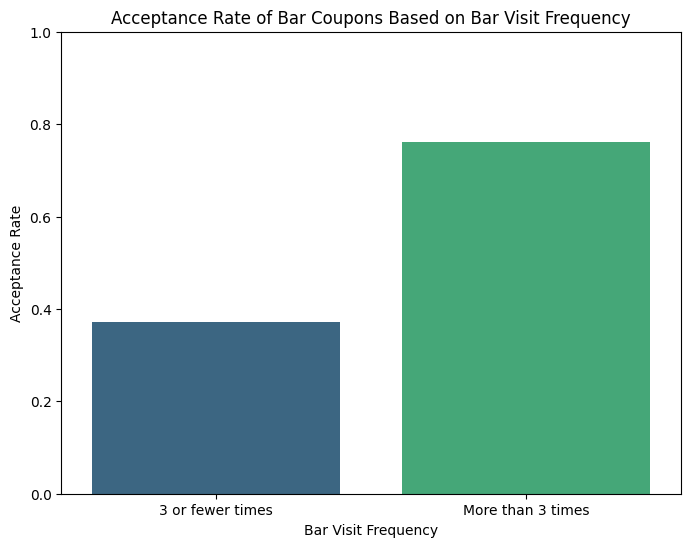

In [22]:
# Create subsets of the data based on bar visit frequency
bar_less_equal_3 = bar_coupons_data[bar_coupons_data['Bar'].isin(['never', 'less1', '1~3'])]
bar_more_than_3 = bar_coupons_data[bar_coupons_data['Bar'].isin(['4~8', 'gt8'])]

# Calculate acceptance rates
acceptance_rate_less_equal_3 = bar_less_equal_3['Y'].mean()
acceptance_rate_more_than_3 = bar_more_than_3['Y'].mean()

print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_rate_less_equal_3:.2%}")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_rate_more_than_3:.2%}")

# Create a bar plot to visualize the comparison
acceptance_rates = pd.DataFrame({
    'Frequency': ['3 or fewer times', 'More than 3 times'],
    'Acceptance Rate': [acceptance_rate_less_equal_3, acceptance_rate_more_than_3]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Frequency', y='Acceptance Rate', hue='Frequency', data=acceptance_rates, palette="viridis", dodge=False, legend=False)
plt.title('Acceptance Rate of Bar Coupons Based on Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.xlabel('Bar Visit Frequency')
plt.ylim(0, 1)
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 68.28%
Acceptance rate for all other drivers: 33.69%


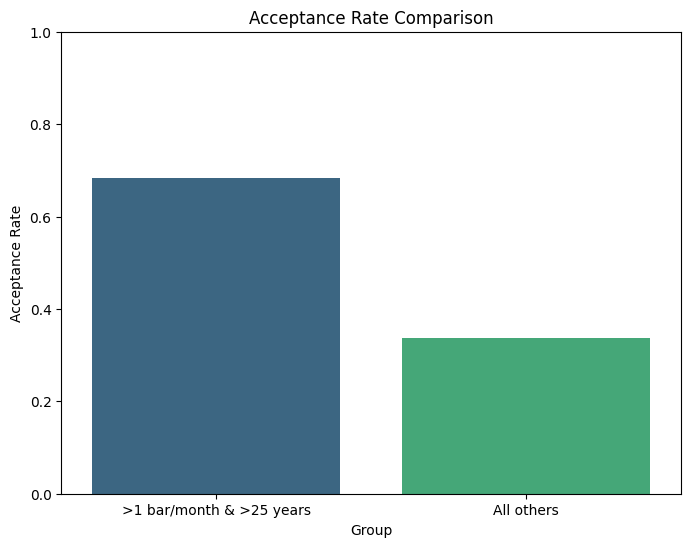

In [23]:
# Create subsets based on the conditions
subset_1 = bar_coupons_data[(bar_coupons_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons_data['age'] > '25')]
subset_2 = bar_coupons_data[~((bar_coupons_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons_data['age'] > '25'))]

# Calculate acceptance rates
acceptance_rate_subset_1 = subset_1['Y'].mean()
acceptance_rate_subset_2 = subset_2['Y'].mean()

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {acceptance_rate_subset_1:.2%}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_subset_2:.2%}")

# Create a bar plot to visualize the comparison
acceptance_rates = pd.DataFrame({
    'Group': ['>1 bar/month & >25 years', 'All others'],
    'Acceptance Rate': [acceptance_rate_subset_1, acceptance_rate_subset_2]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Acceptance Rate', hue='Group', data=acceptance_rates, palette="viridis", dodge=False, legend=False)
plt.title('Acceptance Rate Comparison')
plt.ylabel('Acceptance Rate')
plt.xlabel('Group')
plt.ylim(0, 1)
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [25]:
# Create subsets based on the conditions
subset_1 = bar_coupons_data[
    (bar_coupons_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_coupons_data['passanger'] != 'Kid(s)') & 
    (~bar_coupons_data['occupation'].isin(['Farming Fishing & Forestry']))
]
subset_2 = bar_coupons_data[
    ~(
        (bar_coupons_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
        (bar_coupons_data['passanger'] != 'Kid(s)') & 
        (~bar_coupons_data['occupation'].isin(['Farming Fishing & Forestry']))
    )
]

# Calculate acceptance rates
acceptance_rate_subset_1 = subset_1['Y'].mean()
acceptance_rate_subset_2 = subset_2['Y'].mean()

print(f"Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {acceptance_rate_subset_1:.2%}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_subset_2:.2%}")


Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 70.94%
Acceptance rate for all other drivers: 29.72%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 62.41%
Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: 62.90%
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 60.17%


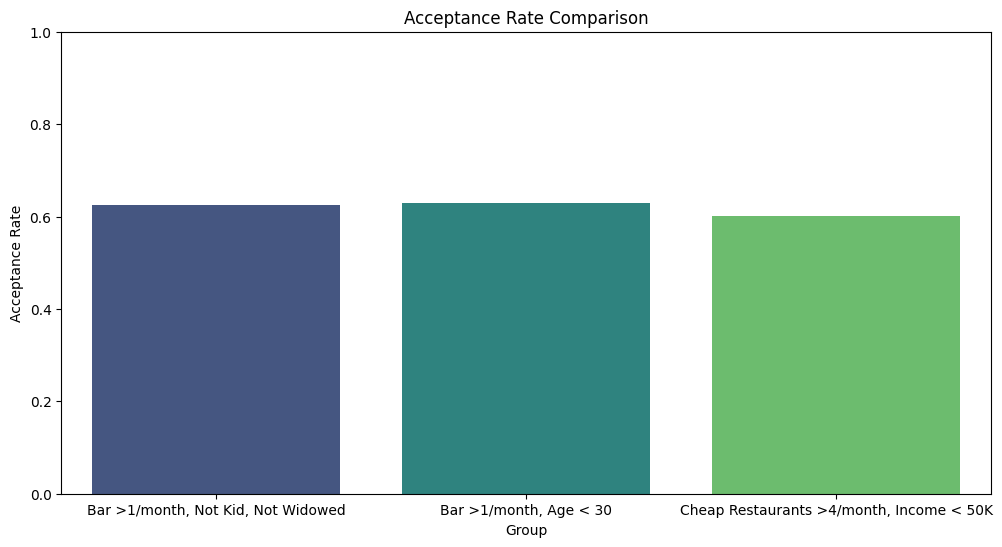

In [26]:
# Define conditions
condition_1 = (
    (clean_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (clean_data['passanger'] != 'Kid(s)') & 
    (clean_data['maritalStatus'] != 'Widowed')
)

condition_2 = (
    (clean_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (clean_data['age'] < '30')
)

condition_3 = (
    (clean_data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
    (clean_data['income'] < '$50000')
)

# Create subsets
subset_1 = clean_data[condition_1]
subset_2 = clean_data[condition_2]
subset_3 = clean_data[condition_3]

# Calculate acceptance rates
acceptance_rate_subset_1 = subset_1['Y'].mean()
acceptance_rate_subset_2 = subset_2['Y'].mean()
acceptance_rate_subset_3 = subset_3['Y'].mean()

print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {acceptance_rate_subset_1:.2%}")
print(f"Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: {acceptance_rate_subset_2:.2%}")
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {acceptance_rate_subset_3:.2%}")

# Create a bar plot to visualize the comparison
acceptance_rates = pd.DataFrame({
    'Group': [
        'Bar >1/month, Not Kid, Not Widowed', 
        'Bar >1/month, Age < 30', 
        'Cheap Restaurants >4/month, Income < 50K'
    ],
    'Acceptance Rate': [
        acceptance_rate_subset_1, 
        acceptance_rate_subset_2, 
        acceptance_rate_subset_3
    ]
})

plt.figure(figsize=(12, 6))
sns.barplot(x='Group', y='Acceptance Rate', hue='Group', data=acceptance_rates, palette="viridis", dodge=False, legend=False)
plt.title('Acceptance Rate Comparison')
plt.ylabel('Acceptance Rate')
plt.xlabel('Group')
plt.ylim(0, 1)
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Hypothesis 
1. Social and Frequent Bar Visitors:Drivers who are socially active and frequent bar-goers are more likely to accept bar coupons.

2. Youth and Flexibility: Younger drivers, particularly those under 30, show higher acceptance rates, possibly due to more flexible and socially active lifestyles.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Given the volume of coupons, I want to investigate coffee house coupons more as this could move the needed for the business if there a ways to increase acceptance of these coupon types. 

In [27]:
# Filter the DataFrame to contain only coffee house coupons
coffee_house_coupons_data = clean_data[clean_data['coupon'] == 'Coffee House']
# Count the number of rows
row_count = coffee_house_coupons_data.shape[0]

# Print or use row_count as needed
print(f"Number of rows where coupon is 'Coffee House': {row_count}")

Number of rows where coupon is 'Coffee House': 3809


In [29]:
# A couple variable that could be good areas to explore are where is the person headed, when are traveling and if they have passengers.  
# This analysis will dig deeper into these variables

# Display value counts for destination, time of day, and passengers
destination_counts = coffee_house_coupons_data['destination'].value_counts()
time_counts = coffee_house_coupons_data['time'].value_counts()
passenger_counts = coffee_house_coupons_data['passanger'].value_counts()

print("Value counts for destination:")
print(destination_counts)
print("\nValue counts for time of day:")
print(time_counts)
print("\nValue counts for passengers:")
print(passenger_counts)

Value counts for destination:
destination
No Urgent Place    2048
Home                886
Work                875
Name: count, dtype: int64

Value counts for time of day:
time
6PM     1038
7AM      875
10AM     856
2PM      758
10PM     282
Name: count, dtype: int64

Value counts for passengers:
passanger
Alone        2154
Friend(s)    1173
Partner       290
Kid(s)        192
Name: count, dtype: int64


In [30]:
# Calculate acceptance rates based on destination
destination_acceptance = coffee_house_coupons_data.groupby('destination')['Y'].mean()

# Calculate acceptance rates based on time of day
time_acceptance = coffee_house_coupons_data.groupby('time')['Y'].mean()

# Calculate acceptance rates based on passengers
passenger_acceptance = coffee_house_coupons_data.groupby('passanger')['Y'].mean()

print("\nAcceptance rates for destination:")
print(destination_acceptance)
print("\nAcceptance rates for time of day:")
print(time_acceptance)
print("\nAcceptance rates for passengers:")
print(passenger_acceptance)




Acceptance rates for destination:
destination
Home               0.362302
No Urgent Place    0.577148
Work               0.440000
Name: Y, dtype: float64

Acceptance rates for time of day:
time
10AM    0.634346
10PM    0.429078
2PM     0.544855
6PM     0.410405
7AM     0.440000
Name: Y, dtype: float64

Acceptance rates for passengers:
passanger
Alone        0.433612
Friend(s)    0.596760
Kid(s)       0.468750
Partner      0.565517
Name: Y, dtype: float64


# Customers with no urgent place (destination), 10am and with friends/partner have the highest acceptance rates.  Let looks a some visualizations

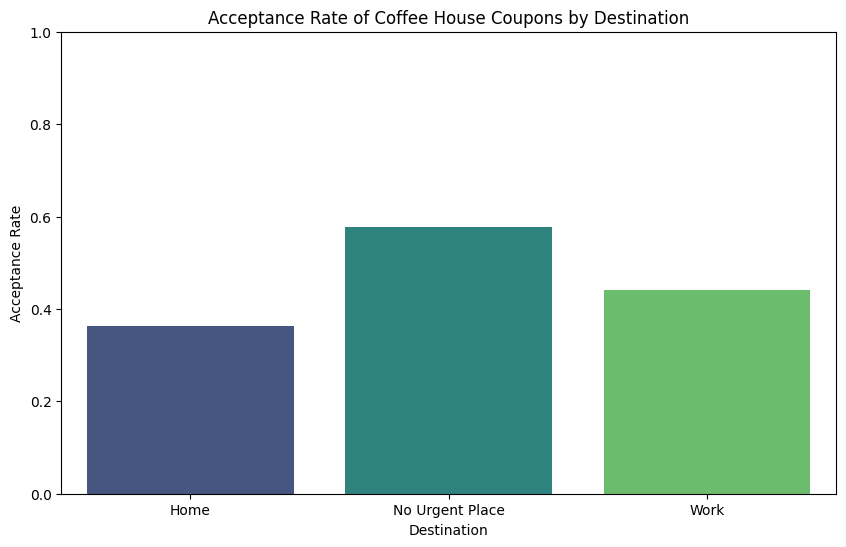

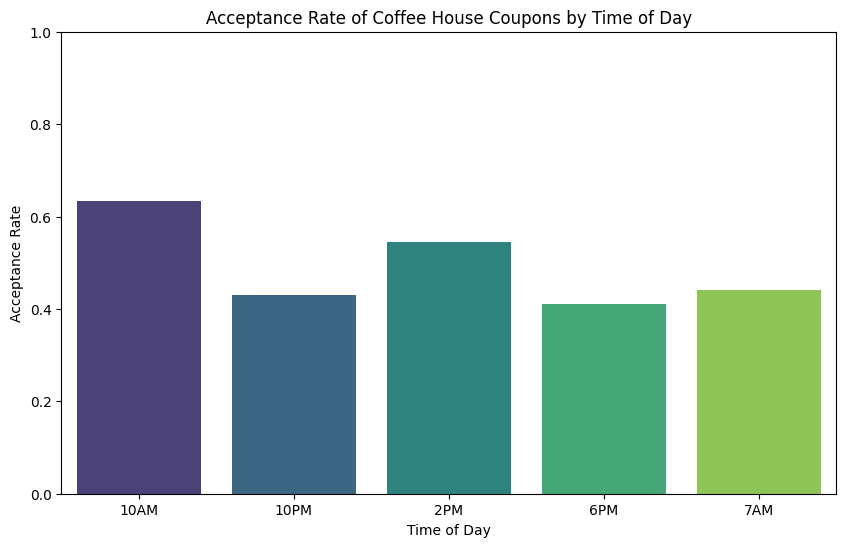

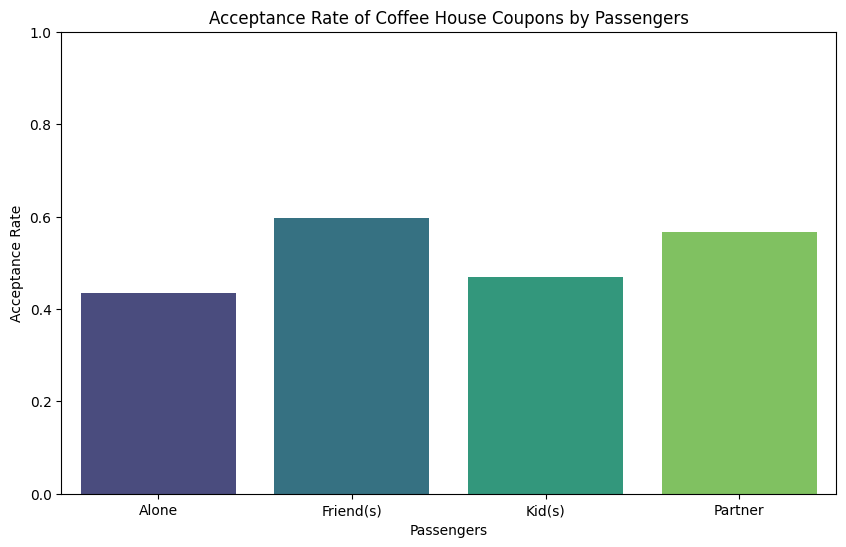

In [51]:

# Visualize acceptance rates by destination
plt.figure(figsize=(10, 6))
sns.barplot(x=destination_acceptance.index, y=destination_acceptance.values, hue=destination_acceptance.index, palette="viridis", dodge=False, legend=False)
plt.title('Acceptance Rate of Coffee House Coupons by Destination')
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

# Visualize acceptance rates by time of day
plt.figure(figsize=(10, 6))
sns.barplot(x=time_acceptance.index, y=time_acceptance.values, hue=time_acceptance.index, palette="viridis", dodge=False, legend=False)
plt.title('Acceptance Rate of Coffee House Coupons by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

# Visualize acceptance rates by passengers
plt.figure(figsize=(10, 6))
sns.barplot(x=passenger_acceptance.index, y=passenger_acceptance.values, hue=passenger_acceptance.index, palette="viridis", dodge=False, legend=False)
plt.title('Acceptance Rate of Coffee House Coupons by Passengers')
plt.xlabel('Passengers')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()

# Lets isolate Friends and Partners vs alone.  Then look at acceptance over time and destination to these groupings

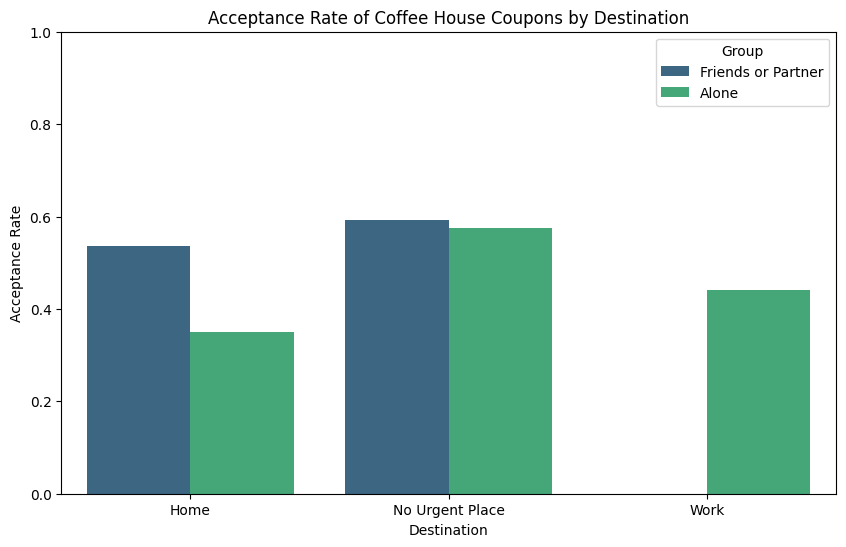

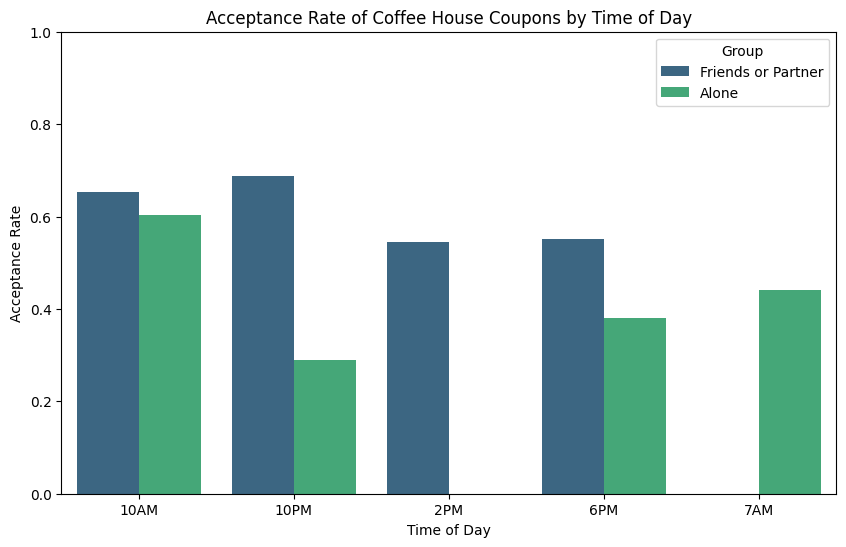

In [54]:
# Filter for friend(s) or partner
friends_or_partner = coffee_house_coupons_data[coffee_house_coupons_data['passanger'].isin(['Friend(s)', 'Partner'])]

# Filter for Alone
alone = coffee_house_coupons_data[coffee_house_coupons_data['passanger'] == 'Alone']

# Calculate acceptance rates based on destination
destination_acceptance_friends_or_partner = friends_or_partner.groupby('destination')['Y'].mean()
destination_acceptance_alone = alone.groupby('destination')['Y'].mean()

# Align the indexes
destination_acceptance_combined = pd.concat([destination_acceptance_friends_or_partner, destination_acceptance_alone], axis=1).reset_index()
destination_acceptance_combined.columns = ['Destination', 'Friends or Partner', 'Alone']

# Melt the DataFrame for plotting
destination_acceptance_combined = destination_acceptance_combined.melt(id_vars='Destination', var_name='Group', value_name='Acceptance Rate')

# Visualize acceptance rates by destination
plt.figure(figsize=(10, 6))
sns.barplot(x='Destination', y='Acceptance Rate', hue='Group', data=destination_acceptance_combined, palette="viridis")
plt.title('Acceptance Rate of Coffee House Coupons by Destination')
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.legend(title='Group')
plt.show()

# Calculate acceptance rates based on time of day
time_acceptance_friends_or_partner = friends_or_partner.groupby('time')['Y'].mean()
time_acceptance_alone = alone.groupby('time')['Y'].mean()

# Align the indexes
time_acceptance_combined = pd.concat([time_acceptance_friends_or_partner, time_acceptance_alone], axis=1).reset_index()
time_acceptance_combined.columns = ['Time', 'Friends or Partner', 'Alone']

# Melt the DataFrame for plotting
time_acceptance_combined = time_acceptance_combined.melt(id_vars='Time', var_name='Group', value_name='Acceptance Rate')

# Visualize acceptance rates by time of day
plt.figure(figsize=(10, 6))
sns.barplot(x='Time', y='Acceptance Rate', hue='Group', data=time_acceptance_combined, palette="viridis")
plt.title('Acceptance Rate of Coffee House Coupons by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.legend(title='Group')
plt.show()

*Summary*

Hypthosesis: People not alone and not with kids, are more likely to accept because they are looking for entertainment. Targeting when they are headed home or no destination between 10am and 6pm are more likely to go to a coffee shop

# *Final Summary*

Findings: 

1. People that already go to bar once a month are much more likely to accept a bar coupon. No kids, not divorced and under 30 also increase acceptance rate.
2. People with friends or partners headed home or not specific destination, are more likely accept coffee house coupons. Afternoon to evening 2pm to 10pm have the best acceptance rates. 



Hypthosesis: People not alone and not with kids, are more likely to accept because they are looking for entertainment. Targeting when they are headed home or no destination between 2pm and 10pm 

Next Steps:

Explore age and other demographics information to see if we define a tighter cohort.

To validate: Run an experiment target people between 2PM -10pm that are headed home or no destination and not alone, 
Possible experiments: 
1. Coffee coupon vs resturaunt
2. Coffee coupon vs take away/carry out 
3. Coffee coupon vs bar

